# SVM Classifier for non-linearly separable data

In [1]:
# Import usual libraries
import numpy as np
import matplotlib.pyplot as plt

# Make all figures tiny for readability purpose
from matplotlib import rcParams
rcParams['figure.figsize'] = (5,3)

## 1. Let's build our "XOR" dataset

Let's try to classify a non-linearly separable dataset like this one

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/05-Model-Tuning/non-linear-dataset.png" width=450>

To that end, we will create a 2D dataset using [logical XOR gates](https://en.wikipedia.org/wiki/XOR_gate)

Try to understand how this works by playing with `np.logical_xor` in the cells below:

In [2]:
print(np.logical_xor(True, True))
print(np.logical_xor(True, False))
print(np.logical_xor(False, False))

False
True
False


In [3]:
np.logical_xor([True, True, False], [True, False, False])

array([False,  True, False])

Let's now create our own synthetic 2D dataset where: 

$$ y = 
\begin{cases}
    1 & \text{if } (X_1>0 \textbf{ xor } X_2>0) \\
    0 & \text{otherwise}
\end{cases}
$$


In [4]:
# Number of datapoints
n = 500
noise = 0.2

Text(0, 0.5, 'X2')

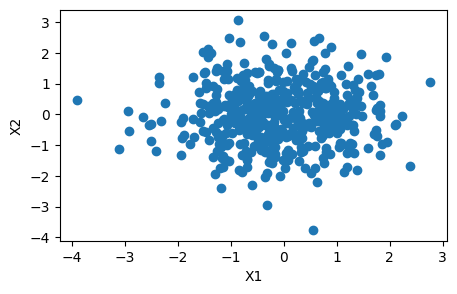

In [5]:
rng = np.random.default_rng(0)
X = rng.standard_normal((n, 2))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("X1")
plt.ylabel("X2")


In [12]:
print(X.shape)
x1 = X[:, 0]
x2 = X[:, 1]
print(x1)
print (x2)



(500, 2)
[ 0.12573022  0.64042265 -0.53566937  1.30400005 -0.70373524 -0.62327446
 -2.32503077 -1.24591095 -0.54425898  0.41163054 -0.12853466 -0.66519467
  0.90347018 -0.74349925 -0.45772583 -1.00961818 -0.15922501  0.21465912
 -0.65382861  0.78397547 -1.25906553  1.34587542  0.26445563  1.45802068
  1.80163487  0.35738041 -0.00445413 -1.28836146  0.42986369 -1.18411797
 -0.43643525  1.73936788  0.32896963  1.58347288  0.63335262  0.05202897
  1.00396158  1.82201136 -0.66152802  0.04905461  0.18851919 -0.37756351
 -1.27768017  0.58116581 -0.75460579 -0.28738771 -0.43278585  0.24978537
  0.16100958 -1.34121971  0.50268285 -0.16429459  0.87304215 -0.7130681
 -2.25014117 -0.58164084 -0.07570153  0.69417194  1.42098202  0.84373266
  0.78758822  0.07559361 -0.1350451  -1.42274177 -0.56854945 -1.04300108
  0.35867195 -0.01391467  1.40226483 -2.36530391  0.33962001  0.37122742
  0.31941422 -1.9016353  -0.80373185 -0.28876651 -0.84960596 -0.01153306
  0.30068511 -1.18571981  0.51305213 -0.530

In [13]:
# Then, build our binary class y
# where y=1 if and only if (X1 > ε xor X2 > ε)
# epsilon ε not exactly zero to simulate "noise"

epsilon = noise * rng.standard_normal(n)

y_bool = np.logical_xor(
    x1 > epsilon,
    x2 > epsilon
)
y = np.where(y_bool, 1, 0)
print(y)

[0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1
 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0
 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0
 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1
 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0
 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0
 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0
 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0
 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1
 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0
 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 1 0 0 

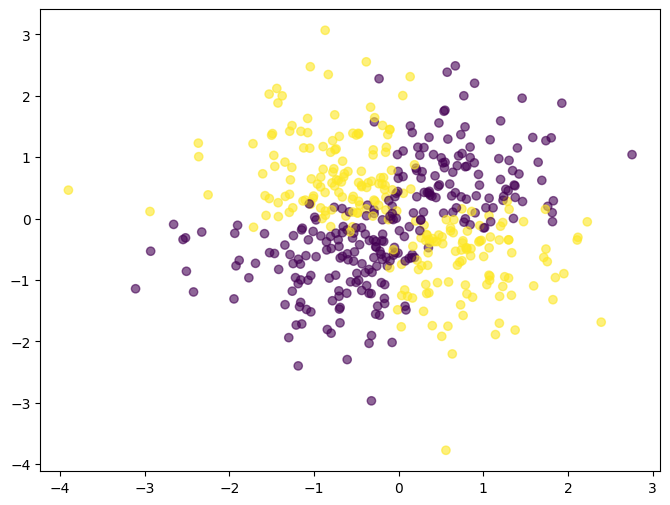

In [8]:
# We have re-created the XOR quadrant!
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6)
plt.show()

## 2 - Linear SVM

Welcome _Support Vector Machine (SVM)_ 🎉

Linear SVM classifier's goal is to find the best vector **w**

<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/05-Model-Tuning/hyperplane.png" width=500>

- whose direction uniquely determines the decision boundary hyperplane
- and minimizes the sum of hinge losses for outliers

👉 **w** contains all model parameters learned during `.fit()`  
👉 `C` is the **cost** associated with the **wrong** classification

___
❓ Fit a **linear** SVC classifier on the whole dataset with the value `C` = 1. 

In [14]:
import pandas as pd
d = {'x': x1, 'y': x2, 'class': y}
df = pd.DataFrame(data=d)
df

,x,y,class
0,0.125730,-0.132105,0
1,0.640423,0.104900,0
2,-0.535669,0.361595,1
3,1.304000,0.947081,0
4,-0.703735,-1.265421,0
...,...,...,...
495,0.397463,-1.743195,1
496,-0.438467,-0.148596,0
497,-1.424875,1.882338,1
498,-0.540773,1.389972,1


In [ ]:
X = df[['x', 'y']]
y = df['class']

In [15]:
# YOUR CODE HERE
from sklearn.svm import SVC



In [17]:
classifier = SVC(kernel='linear', C=1)
clf = classifier.fit(X, y)


❓ Visualize the decision boundaries of your model using the `plot_decision_regions` function given to you in `utils/plots.py`

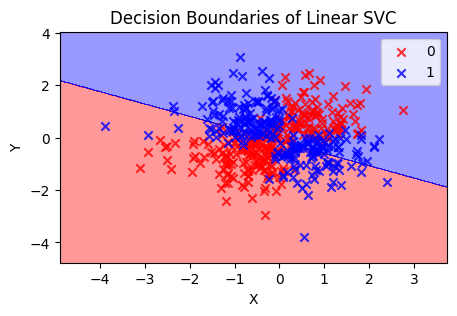

In [20]:
from utils.plots import plot_decision_regions

plot_decision_regions(X, y, classifier=classifier)
plt.title('Decision Boundaries of Linear SVC')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


❓Save below your "guesstimated" accuracy score for this model (roughly) 

In [25]:
linear_svm_score = 0.5

In [ ]:
# YOUR CODE HERE

❓ Do you think the value of `C` has any importance in this case?

<details><summary>Answer</summary>
    
☝️ Linear SVM classifiers always separate data points with a straight line, no matter the cost, `c`, being applied to wrongly classified data points. We are structurally trying to fit the wrong type of model to the dataset.

</details>

In [ ]:
# YOUR CODE HERE

Do you think a Logistic Regression would perform better? Feel free to try.

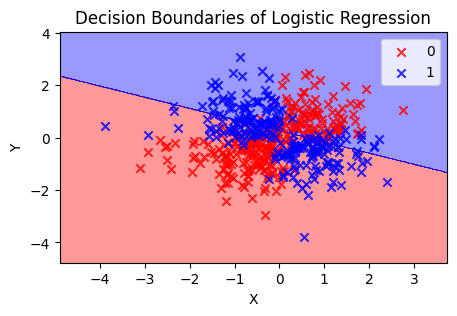

In [23]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

# Creating and fitting the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

plot_decision_regions(X, y, classifier=log_reg)
plt.title('Decision Boundaries of Logistic Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

🧪 Test your code

In [26]:
from nbresult import ChallengeResult

result = ChallengeResult('linear_svm',
    linear_svm_score=linear_svm_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/05-Model-Tuning/data-svm/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_linear_svm.py::TestLinearSvm::test_score PASSED                     [100%]

============================== 1 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/linear_svm.pickle

git commit -m 'Completed linear_svm step'

git push origin master



In [27]:
! git add tests/linear_svm.pickle

! git commit -m 'Completed linear_svm step'

! git push origin master

[master 54c635b] Completed linear_svm step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/linear_svm.pickle
Enumerating objects: 19, done.
Counting objects: 100% (19/19), done.
Delta compression using up to 4 threads
Compressing objects: 100% (18/18), done.
Writing objects: 100% (19/19), 9.50 KiB | 2.38 MiB/s, done.
Total 19 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (3/3), done.
To github.com:juliensoudet/data-svm.git
 * [new branch]      master -> master


## 3. Kernel SVM 🔥

📚 First, **read section 5 (Kernels) of today's lecture carefully**. Take your time, it is part of the challenge

❓In your own words, what is a Kernel in one sentence?

<details>
    <summary>A possible answer</summary>

It is a measure of "similarity" between points, which is used to classify points in SVM models (two points with large similarity would be classified similarly)
</details>

❓Cite below 4 different kernel by their names

<details>
    <summary>A possible answer</summary>

- Linear
- Polynomial
- Radial Basis Fonction (rbf)
- Sigmoid
</details>

## 3.2 Polynomial Kernels

A polynomial kernel of degree 2 is as follows 
    $$K(\textbf{a},\textbf{b}) = (\textbf{a}^T\textbf{b} + c )^2$$

By changing the kernel, we have changed our notion of _similarity_: instead of measuring similarity by how close the points are in terms of dot product ("cosine similarity") for the linear kernel, we are measuring similarity based on **whether points are within a circle to each other or not.** 

This is **equivalent** to creating the new quadratic features as below (Kernel Trick)
    $$\phi(x) = \begin{bmatrix} x_1^2 \\ x_1 x_2 \\ x_2 x_1 \\ x_2^2 \\  \sqrt{2c} \ x_1 \\ \sqrt{2c} \ x_2\end{bmatrix}$$

❓ Intuitively speaking, what do you think is the minimum number of kernel "degrees" `d` we need to best fit our XOR dataset? 

<details>
    <summary>Answer</summary>

`d=2` should be enough because our XOR condition can be computed from polynom `x1 * x2`
    
$$    
    class = 
\begin{cases}
    0 & \text{if } x_1 x_2 > 0\\
    1 & \text{otherwise}
\end{cases}
$$
</details>


❓ Fit and plot a SVM `poly` of degree 2, keeping `C = 100` large enough so as to visualize the "maximum margin classifier"

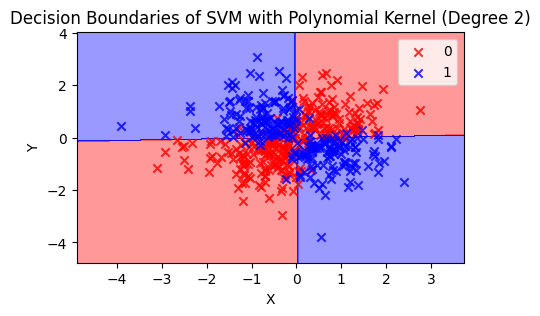

In [29]:
# YOUR CODE HERE
svm_poly = SVC(kernel='poly', degree=2, C=100)
svm_poly.fit(X, y)

plot_decision_regions(X, y, classifier=svm_poly)
plt.title('Decision Boundaries of SVM with Polynomial Kernel (Degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

❓ Given that you know how this XOR dataset has been engineered, which adjectives best describe your svm's performance?

In [34]:
a = "is underfitting"
b = "captures all reducible error"
c = "has too high variance"
d = "has only irreducible errors left"

poly_svm_performance = [b,d] # [?] # fill the list with the answer(s)


🧪 Test your code

In [35]:
from nbresult import ChallengeResult

result = ChallengeResult('poly_svm',
    poly_svm_performance=poly_svm_performance)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/05-Model-Tuning/data-svm/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_poly_svm.py::TestPolySvm::test_performance PASSED                   [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/poly_svm.pickle

git commit -m 'Completed poly_svm step'

git push origin master



In [36]:
! git add tests/poly_svm.pickle

! git commit -m 'Completed poly_svm step'

! git push origin master

[master cf6876f] Completed poly_svm step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/poly_svm.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 488 bytes | 244.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:juliensoudet/data-svm.git
   54c635b..cf6876f  master -> master


❓ Still not convinced? You can double-check that the polynomial kernel is equivalent to having access to polynomial features by fitting this model below:

- We create polynomial features as a first step (feature engineering)
- and then fit a linear SVM.

(And don't worry about the syntax of pipelines, we will see more on pipelines in the next lecture! 🔥)

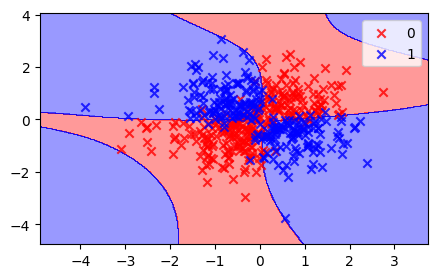

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Choose your degree
degree = 4

equivalent_polynomial_model = make_pipeline(
    (PolynomialFeatures(degree=degree)),  # First, create all polynomial combinations of your features
    (SVC(kernel="linear", C=100))  # Then, fit a linear SVM
)
equivalent_polynomial_model.fit(X, y)
plot_decision_regions(X, y, classifier=equivalent_polynomial_model)

☝️ Although mathematically equivalent, this manual feature engineering requires much more computational power than the kernel trick, and will not scale with higher dimensionality!

### Moons dataset

Let's now try with a harder dataset to classifiy!

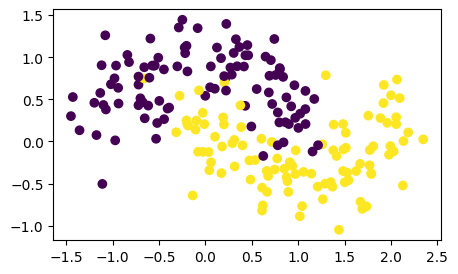

In [41]:
from sklearn.datasets import make_moons

n=200
X,y = make_moons(n_samples=n, noise=0.25, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y);

❓ Try to fit a polynomial SVM kernel to this dataset 

Try it out **visually** below by changing the values of `C` and `degree` and `coef0`.

`coef0` plays the role of $c$ in $K(\textbf{a},\textbf{b}) = (\textbf{a}^T\textbf{b} + c )^d$
- When equal to 0, you only have access to the d-th degree polynomial features
- The higher it is, the more your model will consider lower degree features

In [42]:
from ipywidgets import interact # pip install ipywidgets if you haven't done it already

@interact(C=[1, 10, 1000, 10000, 100000], degree=[1,2,3,4,5,6,7,8,9], coef0=[0,0.5,1,2,5,10,100])
def svc(C, degree, coef0):
    svm = SVC(kernel='poly', C=C, coef0=coef0, degree=degree)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', options=(1, 10, 1000, 10000, 100000), value=1), Dropdown(descr…

☝️ A polynomial kernel can fit pretty much anything as long as the degree is high enough.  

However, be aware that polynomial kernels with too high a degree will make models prone to overfitting!


## 3.3 RBF - Radial Basis Function Kernel (aka gaussian)

Here comes the RBF Kernel! 
Pretty much the go-to kernel for SVM (and default one in sklearn).   

It proves very robust to a variety of problems, and is easier to fine-tune than polynomial, as it only requires gridsearching its kernel hyper-parameter `gamma` $\gamma$, on top of `C` of course

$K(\textbf{a},\textbf{b}) = \exp[ \left( - \gamma ||\textbf{a}-\textbf{b}||^2\right)$

- The larger the euclidian distance between two points $||\textbf{a}-\textbf{b}||^2$, the closer the kernel function is to zero. This means that two points far away are more likely to be different.

- `gamma` $\gamma$ reduces each instance’s range of influence on the others (**myopia**). Stronger $\gamma$ values will make your model overfit by looking "too closely" at small-scale irregularities

- `C` still controls the **hardness** of the margin. Stronger values will make your model overfit.

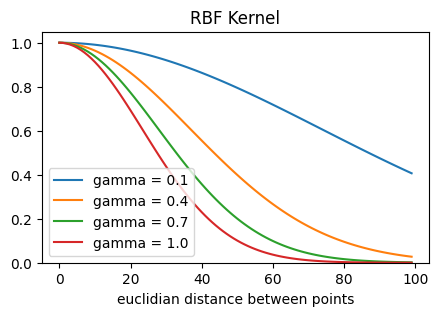

In [45]:
# Let's show below the impact of gamma "myopia" in the Kernel
for gamma in np.linspace(0.1, 1, 4):
    plt.plot(np.exp(-gamma*np.linspace(0, 3, 100)**2),
             label=f'gamma = {gamma}')
plt.ylim(0,)
plt.title('RBF Kernel')
plt.xlabel('euclidian distance between points')
plt.legend();

❓ Fit and plot decision regions of an SVM classifier with an RBF kernel

- Start with a model with very low variance (ex: `gamma=0.01` and `C=0.1`)
- Increase `gamma` until you observe obvious overfitting. It should be clearly visible on the graph. 

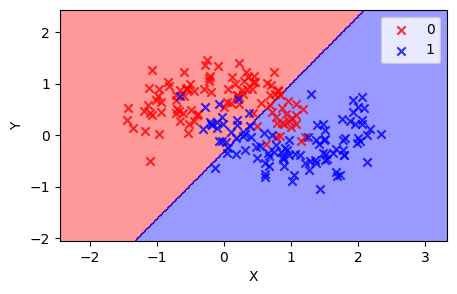

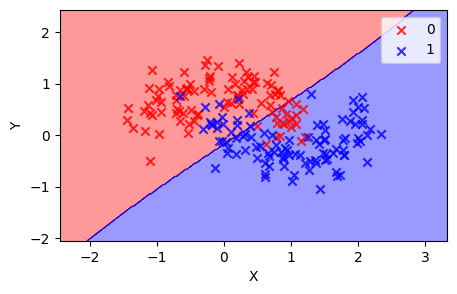

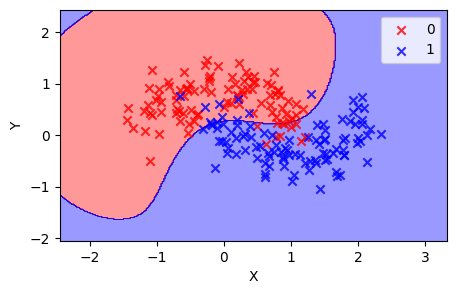

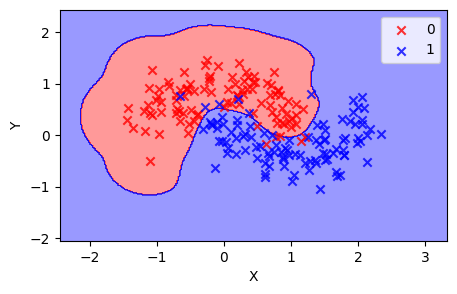

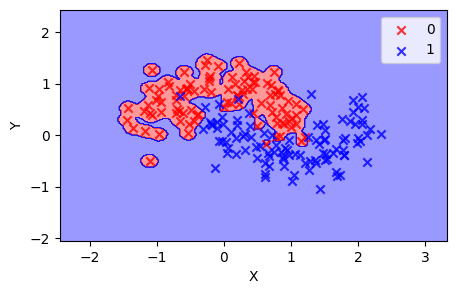

In [51]:
# YOUR CODE HERE
svm_rbf_low = SVC(kernel='rbf', gamma=0.01, C=0.1)
svm_rbf_low.fit(X, y)

# Plot decision regions
plot_decision_regions(X, y, classifier=svm_rbf_low)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Increase gamma until overfitting is observed
gamma_values = [0.1, 1, 10, 100]
for gamma in gamma_values:
    svm_rbf_high = SVC(kernel='rbf', gamma=gamma, C=0.1)
    svm_rbf_high.fit(X, y)
    
    plot_decision_regions(X, y, classifier=svm_rbf_high)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


❓ Now, use you best estimated value of gamma (for instance `gamma=1`), and increase `C` this time until you overfit


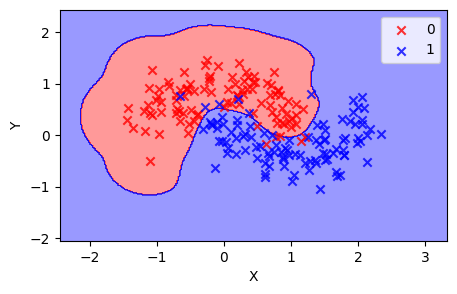

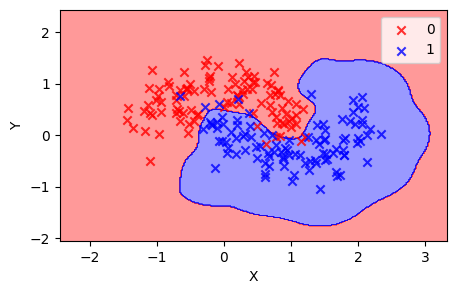

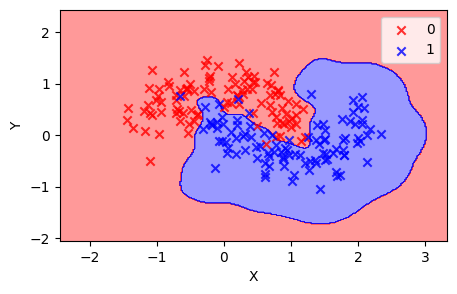

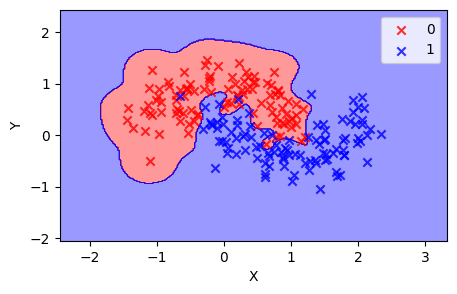

In [52]:
# YOUR CODE HERE
svm_rbf_low = SVC(kernel='rbf', gamma=10, C=0.1)
svm_rbf_low.fit(X, y)

C_values = [0.1, 1, 10, 100]
for C in C_values:
    svm_rbf_high = SVC(kernel='rbf', gamma=10, C=C)
    svm_rbf_high.fit(X, y)
    
    plot_decision_regions(X, y, classifier=svm_rbf_high)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


☝️ Feel free to create your own interactive plot using `@interact` as above and try to "visually" find the best `C` and `gamma`

In [53]:
from ipywidgets import interact
import ipywidgets as widgets

@interact(C=[0.1, 1, 10, 100, 1000, 10000], gamma = [0.001, 0.01, 0.1, 1, 10])
def svc(C=1, gamma=1):
    svm = SVC(kernel='rbf', gamma=gamma, C=C)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', index=1, options=(0.1, 1, 10, 100, 1000, 10000), value=1), Dro…

❓Store below your best visual guess for `C` and `gamma` (rounded to powers of ten: 0.1, 1, 10, 100 ...)

In [56]:
best_c = 100 #?
best_gamma = 0.1 #? 

🧪 Test your code

In [57]:
from nbresult import ChallengeResult
result = ChallengeResult('rbf_svm',
                         best_c=best_c, 
                         best_gamma=best_gamma)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/05-Model-Tuning/data-svm/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_rbf_svm.py::TestRbfSvm::test_hyperparams PASSED                     [100%]

============================== 1 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/rbf_svm.pickle

git commit -m 'Completed rbf_svm step'

git push origin master



In [58]:
! git add tests/rbf_svm.pickle

! git commit -m 'Completed rbf_svm step'

! git push origin master

[master 7a095cb] Completed rbf_svm step
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 tests/rbf_svm.pickle
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 4 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 441 bytes | 441.00 KiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:juliensoudet/data-svm.git
   cf6876f..7a095cb  master -> master


## 3.4 Sigmoid kernel

$K(\textbf{a},\textbf{b}) = tanh(\gamma \textbf{a}^T \textbf{b} +r)$

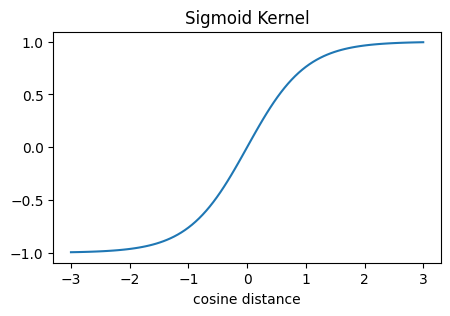

In [59]:
# The "tangent hyperbolic" function resembles sigmoid but can take negative values
x = np.linspace(-3,3,100)
plt.plot(x, np.tanh(x))
plt.xlabel('cosine distance'); plt.title('Sigmoid Kernel');

☝️ The Sigmoid kernel compresses the "cosine similarity" used in the linear kernel into a [-$\gamma$,+$\gamma$] interval.

❓ Try to **visually** fine tune your model with the sigmoid kernel, doing a coarse grain search for 
- `C=[0.1, 1, 10, 100, 1000, 10000]` 
- `gamma = [0.001, 0.01, 0.1, 1, 10]`  

using the `@interact` decorator combined with the `plot_decision_regions` function

In [60]:
@interact(C=[0.1, 1, 10, 100, 1000, 10000], gamma = [0.001, 0.01, 0.1, 1, 10], coef0=0.)
def svc(C=1000, gamma=0.1, coef0=0):
    svm = SVC(kernel='sigmoid', gamma=gamma, C=C, coef0=coef0)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', index=4, options=(0.1, 1, 10, 100, 1000, 10000), value=1000), …

☝️  Not easy to make it work visually, right? Time for an automated GridSearch!

## 4. Grid Search the best kernel

❓ `RandomizedSearchCV` for the best `kernel`, and best kernel hyperparameters at the same time (warning: scikit-learn has issues when gridsearching polynomial kernels at the same time as others)
 
Use your visual intuitions above to define plausible ranges of values to try out

In [61]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [64]:
# YOUR CODE HERE
param = [
    {'kernel': ['linear']},
    {'kernel': ['rbf'], 'gamma': [0.1], 'C': [10]},
    {'kernel': ['poly'], 'degree': [2], 'coef0': [0.2], 'C': [10]}]

param_dist_random_search = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [10],
    'gamma': [0.1],
    'coef0': [0.2]}

grid_search = GridSearchCV(SVC(), param, cv=5)
grid_search.fit(X, y)

randomized_search = RandomizedSearchCV(SVC(), param_dist_random_search, n_iter=100, cv=5)
randomized_search.fit(X, y)


/Users/Laetitia/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=100. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100,
                   param_distributions={'C': [10], 'coef0': [0.2],
                                        'gamma': [0.1],
                                        'kernel': ['linear', 'rbf', 'poly']})

❓ Plot your best model's decision boundaries

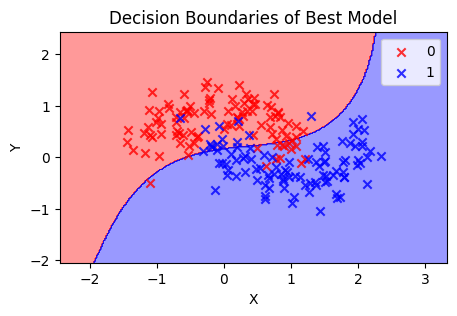

In [67]:
# YOUR CODE HERE
best_model = SVC(**grid_search.best_params_)
best_model.fit(X, y)


plot_decision_regions(X, y, classifier=best_model)
plt.title('Decision Boundaries of Best Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

❓ 5-fold cross-validate its accuracy and store your mean result as `best_svm_cv_accuracy`

In [70]:
# YOUR CODE HERE
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(best_model, X, y, cv=5)

best_svm_cv_accuracy = cross_val_scores.mean()
best_svm_cv_accuracy

0.845

🧪 Test your code

In [71]:
from nbresult import ChallengeResult

result = ChallengeResult('sigmoid_svm',
    best_svm_cv_accuracy=best_svm_cv_accuracy)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/Laetitia/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/Laetitia/code/juliensoudet/05-ML/05-Model-Tuning/data-svm/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_sigmoid_svm.py::TestSigmoidSvm::test_accuracy FAILED                [100%]

=================================== FAILURES ===================================
_________________________ TestSigmoidSvm.test_accuracy _________________________

self = <tests.test_sigmoid_svm.TestSigmoidSvm testMethod=test_accuracy>

    def test_accuracy(self):
    
>       self.assertGreaterEqual(self.result.best_svm_cv_accuracy, 0.9)
E       AssertionError: 0.845 not greater than or equal to 0.9

test_sigmoid_svm.py:8: AssertionError
=========================== short test summary info =============

## 5. Generalization

❓Choose your `best_svm` model to put in "production" in your app on the cloud. Fit it on the half moon dataset.

In [ ]:
# YOUR CODE HERE

After a few days, the model has received and predicted new data points never having seen them before (our "test set")

In [ ]:
# Generate a half-moon test_set of size n_test
n_test = 100
X_test, y_test = make_moons(n_samples=n, noise=0.2, random_state=1)

X_full = np.vstack((X, X_test))
y_full = np.append(y, values = y_test)
test_idx = np.arange(n,n+n_test)

❓ Visualize its performance by doing `plot_decision_regions` including `test_idx` as optional argument.  
Count how many misclassified test samples you get!

In [ ]:
# YOUR CODE HERE

In [ ]:
number_misclassified_test = None

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('generalization',
    number_misclassified_test=number_misclassified_test)
result.write()
print(result.check())

## 6. kNN vs. SVM ?

Such non-linear problem could also fit well on a KNN classifier.
Try to find the best K visually and compare its behavior to the SVM.

In [ ]:
# YOUR CODE HERE

🏁 Congratulation! Dont forget to **commit** and **push** your notebook